# Лабораторная работа 3
ЭН1-35 Кутбиддинов Т. Р. Полозов А. А. Вариант 13

#### Импортируем библиотеки

In [425]:
# !pip install pandapower

In [426]:
import pandapower as pp
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandapower.shortcircuit as sc

#### Копируем конфигурацию сети из 1 лабораторной

In [427]:
def network(com):
    # Создание пустой сети с указанным именем
    net = pp.create_empty_network()
    
    # Создание узлов
    busGS = pp.create_bus(
        net,
        name='generator',
        vn_kv=110
    )
    bus1 = pp.create_bus(
        net,
        name='H1',
        vn_kv=110
    )
    bus2 = pp.create_bus(
        net,
        name='H2',
        vn_kv=110
    )
    bus3 = pp.create_bus(
        net,
        name='H3',
        vn_kv=110
    )
    bus4 = pp.create_bus(
        net,
        name='H4',
        vn_kv=10
    )
    bus5 = pp.create_bus(
        net,
        name='H5',
        vn_kv=10
    )
    bus6 = pp.create_bus(
        net,
        name='H6',
        vn_kv=10
    )
    bus7 = pp.create_bus(
        net,
        name='H7',
        vn_kv=10
    )
    bus8 = pp.create_bus(
        net,
        name='H8',
        vn_kv=10
    )

    # Добавочные узлы
    busGS8 = pp.create_bus(
        net,
        name='HGS8',
        vn_kv=110
    )
    bus35 = pp.create_bus(
        net,
        name='H35',
        vn_kv=110
    )
    bus34 = pp.create_bus(
        net,
        name='H34',
        vn_kv=110
    )

    # Подключение внешней энергосистемы
    pp.create_ext_grid(
        net,
        bus=busGS,
        s_sc_max_mva=100.0,
        s_sc_min_mva=80.0,
        rx_min=0.20,
        rx_max=0.35,
        vm_pu=1.02
    )

    # Создание нагрузок
    pp.create_load(
        net,
        bus=bus1,
        p_mw=12.0,
        q_mvar=11.5
    )
    pp.create_load(
        net,
        bus=bus2,
        p_mw=23.0,
        q_mvar=21.5
    )
    pp.create_load(
        net,
        bus=bus3,
        p_mw=27.0,
        q_mvar=22.0
    )
    pp.create_load(
        net,
        bus=bus4,
        p_mw=5.0,
        q_mvar=3.0
    )
    pp.create_load(
        net,
        bus=bus5,
        p_mw=3.0,
        q_mvar=2.0
    )
    pp.create_load(
        net,
        bus=bus6,
        p_mw=4.0,
        q_mvar=3.0
    )
    pp.create_load(
        net,
        bus=bus7,
        p_mw=2.5,
        q_mvar=1.6
    )
    pp.create_load(
        net,
        bus=bus8,
        p_mw=4.0,
        q_mvar=3.5
    )

    # Создание электрических линий
    pp.create_line_from_parameters(
        net,
        from_bus=busGS,
        to_bus=busGS8,
        length_km=6.1,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus3,
        to_bus=bus35,
        length_km=9.6,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus3,
        to_bus=bus34,
        length_km=8.7,
        r_ohm_per_km=0.46,
        x_ohm_per_km=0.275,
        max_i_ka=0.265,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus1,
        to_bus=bus2,
        length_km=1.4,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus8,
        to_bus=bus7,
        length_km=1.1,
        r_ohm_per_km=0.12,
        x_ohm_per_km=0.378,
        max_i_ka=0.605,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=bus5,
        to_bus=bus6,
        length_km=1.3,
        r_ohm_per_km=0.157,
        x_ohm_per_km=0.377,
        max_i_ka=0.51,
        c_nf_per_km=0
    )

    pp.create_line_from_parameters(
        net,
        from_bus=busGS,
        to_bus=bus1,
        length_km=1.2,
        r_ohm_per_km=0.33,
        x_ohm_per_km=0.234,
        max_i_ka=0.33,
        c_nf_per_km=0
    )

    # Создание коммутационных аппаратов (switches)
    pp.create_switch(
        net,
        bus=bus2,
        element=bus3,
        et="b",
        type="CB",
        closed=True
    )

    pp.create_switch(
        net,
        bus=bus4,
        element=bus5,
        et="b",
        type="CB",
        closed=True
    )

    pp.create_switch(
        net,
        bus=bus7,
        element=bus6,
        et="b",
        type="CB",
        closed=False
    )

    # Создание трансформаторов
    pp.create_transformer_from_parameters(
        net,
        hv_bus=busGS8,
        lv_bus=bus8,
        sn_mva=32,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=10.5,
        i0_percent=0.28,
        pfe_kw=160,
        vkr_percent=(160 / 320)
    )

    pp.create_transformer_from_parameters(
        net,
        hv_bus=bus35,
        lv_bus=bus5,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    pp.create_transformer_from_parameters(
        net,
        hv_bus=bus34,
        lv_bus=bus4,
        sn_mva=40,
        vn_hv_kv=110,
        vn_lv_kv=10,
        vk_percent=11,
        i0_percent=0.3,
        pfe_kw=170,
        vkr_percent=(170 / 400)
    )

    # # Создание конденсаторных батарей
    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus4,
    #     q_mvar=5.0 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[0]
    # )

    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus5,
    #     q_mvar=2.0 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[1]
    # )

    # pp.create_shunt_as_capacitor(
    #     net,
    #     bus=bus7,
    #     q_mvar=1.6 * Com1,
    #     loss_factor=0,
    #     in_service=Com2[2]
    # )
    # Создание генераторов
    if com == 1:
        pp.create_gen(
            net,
            bus=bus4,
            p_mw=1.2,
            vm_pu=1.05,
            cos_phi=0.85,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )
        pp.create_gen(
            net,
            bus=bus4,
            p_mw=1.2,
            vm_pu=1.05,
            cos_phi=0.85,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )
        pp.create_gen(
            net,
            bus=bus5,
            p_mw=8.25,
            vm_pu=1.05,
            cos_phi=0.9,
            vn_kv=10,
            sn_mva=5,
            xdss_pu=0.2,
            rdss_pu=0.005,
            rdss_ohm=0.1
        )

    return net

#### **Расчёт трехфазного КЗ**

##### Максимальная мощность КЗ

In [428]:
# Размыкаю выключатель между шинами 6 и 7 БЕЗ РГ
net = network(0)
sc.calc_sc(
    net,
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.524864,100.000000,1.011668,0.527447,43.969642,125.627547
1,0.523306,99.703250,1.006872,0.525865,44.365642,125.908347
2,0.521498,99.358709,1.001333,0.524028,44.827642,126.235947
3,0.521498,99.358709,1.001333,0.524028,44.827642,126.235947
4,5.073826,87.881245,9.925968,5.100214,0.393071,1.188369
5,5.073826,87.881245,9.925968,5.100214,0.393071,1.188369
6,3.564818,61.744464,6.841433,3.582083,0.597171,1.678469
7,3.399698,58.884497,6.829695,3.419264,0.533937,1.790132
8,4.435257,76.820910,8.954190,4.461281,0.401937,1.374332
9,0.515087,98.137195,0.980096,0.517504,46.775642,127.305047


In [429]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.515087,0.515087,-69.825174,0.515087,110.174826,5.913677,26.070849,0.0,0.0,0.453993,3.827897,0.443160,5.316336,0.980096,0.517504
1,0.483789,0.483789,-65.901745,0.483789,114.098255,4.365679,12.032982,0.0,0.0,0.453993,3.827897,0.453993,3.827897,0.915654,0.486016
2,0.487165,0.487165,-66.325014,0.487165,113.674986,4.276765,12.183127,0.0,0.0,0.453993,3.827897,0.453993,3.827897,0.922825,0.489414
3,0.521498,0.521498,-70.449543,0.521498,109.550457,8.788008,24.319327,0.0,0.0,0.453993,3.827897,0.453993,3.827897,1.001333,0.524028
4,3.399698,3.399698,-73.391906,3.399698,106.608094,4.576947,14.417383,0.0,0.0,0.420834,-0.475532,0.420834,-0.475532,6.829695,3.419264
5,3.564818,3.564818,-70.415310,3.564818,109.584690,7.781065,18.684469,0.0,0.0,0.453993,3.827897,0.453993,3.827897,6.841433,3.582083
6,0.523306,0.523306,-70.589348,0.523306,109.410652,8.912777,24.407800,0.0,0.0,0.453993,3.827897,0.453993,3.827897,1.006872,0.525865


In [430]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.403205,-73.697922,4.435257,106.302078,5.109587,25.590144,0.000000,0.000000,0.443160,5.316336,0.420834,-0.475532
1,0.229631,-71.397239,2.525944,108.602761,4.020840,11.826829,0.005081,0.131412,0.453993,3.827897,0.453993,3.827897
2,0.231632,-71.995374,2.547951,108.004626,3.958786,11.993031,0.004196,0.108518,0.453993,3.827897,0.453993,3.827897


In [431]:
# Ток при максимальной мощности 3Ф КЗ без РГ
print(net.res_bus_sc.ikss_ka)

0     0.524864
1     0.523306
2     0.521498
3     0.521498
4     5.073826
5     5.073826
6     3.564818
7     3.399698
8     4.435257
9     0.515087
10    0.506395
11    0.507781
Name: ikss_ka, dtype: float64


In [432]:
# Размыкаю выключатель между шинами 6 и 7 С РГ
net = network(1)
sc.calc_sc(
    net,
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

aperiodic, thermal short-circuit currents are only implemented for faults far from generators!
Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.900027,171.478180,1.971083,0.907491,16.355521,75.876465
1,0.898826,171.249331,1.970085,0.906309,16.376447,75.978063
2,0.897430,170.983287,1.969005,0.904936,16.398976,76.096918
3,0.897430,170.983287,1.969005,0.904936,16.398976,76.096918
4,9.674330,167.564312,21.841535,9.767478,0.116100,0.646116
5,9.674330,167.564312,21.841535,9.767478,0.116100,0.646116
6,5.379924,93.183024,11.011341,5.413254,0.320200,1.136216
7,4.496340,77.878889,9.736521,4.531737,0.305721,1.378966
8,6.489020,112.393123,14.676066,6.552073,0.173721,0.963166
9,0.874488,166.612314,1.859138,0.880833,19.161521,77.553965


In [433]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.874488,0.874488,-76.121684,0.874488,103.878316,10.344157,45.602929,0.000000,0.000000,0.600437,-0.279736,0.586111,1.208703,1.859138,0.880833
1,0.649723,0.649723,-69.440383,0.649723,110.559617,6.481320,12.038115,1.855809,10.022736,0.602239,-0.495584,0.606251,-1.044998,1.411542,0.654915
2,0.653920,0.653920,-69.783966,0.653920,110.216034,6.410668,12.210583,1.819957,10.110835,0.602239,-0.495584,0.605849,-1.001729,1.421738,0.659164
3,0.521498,0.521498,-70.449543,0.521498,109.550457,12.983181,24.313361,2.793715,20.018360,0.601268,-0.379519,0.602239,-0.495584,1.144192,0.525860
4,4.496340,4.496340,-77.499539,4.496340,102.500461,8.005960,25.218774,0.000000,0.000000,0.565743,-4.336514,0.565743,-4.336514,9.736521,4.531737
5,5.379924,5.379924,-74.261521,5.379924,105.738479,17.722158,42.555756,0.000000,0.000000,0.650913,-0.915319,0.650913,-0.915319,11.011341,5.413254
6,0.523306,0.523306,-70.589348,0.523306,109.410652,13.061346,24.368787,2.600004,19.988349,0.600437,-0.279736,0.601268,-0.379519,1.147005,0.527663


In [434]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.589911,-79.775793,6.489020,100.224207,8.937651,44.762082,0.000000,0.000000,0.586111,1.208703,0.565743,-4.336514
1,0.241134,83.214563,2.652469,-96.785437,6.265286,11.908964,1.986782,10.806953,0.606251,-1.044998,0.650913,-0.915319
2,0.238344,83.459295,2.621786,-96.540705,6.211460,12.091491,1.953222,10.899358,0.605849,-1.001729,0.650913,-0.915319


In [435]:
# Ток при максимальной мощности 3Ф КЗ c РГ
print(net.res_bus_sc.ikss_ka)

0     0.900027
1     0.898826
2     0.897430
3     0.897430
4     9.674330
5     9.674330
6     5.379924
7     4.496340
8     6.489020
9     0.874488
10    0.870983
11    0.873361
Name: ikss_ka, dtype: float64


##### Минимальная мощность КЗ

In [436]:
# Размыкаю выключатель между шинами 6 и 7 БЕЗ РГ
net = network(0)

# Конечная температура проводника
# после короткого замыкания
net.line['endtemp_degree'] = 80

sc.calc_sc(
    net,
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.419891,80.000000,0.925067,0.423473,29.662565,148.312827
1,0.418860,79.803592,0.920011,0.422382,30.153605,148.593627
2,0.417660,79.574876,0.914178,0.421115,30.726485,148.921227
3,0.417660,79.574876,0.914178,0.421115,30.726485,148.921227
4,4.111607,71.215131,9.020893,4.145998,0.280704,1.375853
5,4.111607,71.215131,9.020893,4.145998,0.280704,1.375853
6,2.974803,51.525104,6.038963,2.992641,0.533788,1.865953
7,2.845743,49.289715,6.088930,2.866979,0.452942,1.977614
8,3.634848,62.957418,8.133417,3.668296,0.289262,1.561814
9,0.413445,78.771817,0.891699,0.416641,33.142005,149.990327


In [437]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.258704,0.258704,-77.099773,0.258704,102.900227,0.0,-0.0,-4.349769,-17.930129,0.0,0.0,0.0,0.0,0.891699,0.416641
1,0.031492,0.031492,-130.685122,0.031492,49.314878,0.0,-0.0,-3.454036,-8.224631,0.0,0.0,0.0,0.0,0.827757,0.390623
2,0.034665,0.034665,-130.554911,0.034665,49.445089,0.0,-0.0,-3.403205,-8.362931,0.0,0.0,0.0,0.0,0.834853,0.393354
3,0.270437,0.270437,-74.035896,0.270437,105.964104,0.0,-0.0,-7.429575,-16.863494,0.0,0.0,0.0,0.0,0.914178,0.421115
4,2.845743,2.845743,-77.099773,2.845743,102.900227,0.0,-0.0,0.000000,-0.000000,0.0,0.0,0.0,0.0,6.088930,2.866979
5,2.974803,2.974803,-74.035896,2.974803,105.964104,0.0,-0.0,0.000000,-0.000000,0.0,0.0,0.0,0.0,6.038963,2.992641
6,0.270437,0.270437,-74.035896,0.270437,105.964104,0.0,-0.0,-7.555269,-16.935372,0.0,0.0,0.0,0.0,0.920011,0.422382


In [438]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.258704,-77.099773,2.845743,102.900227,0.0,-0.0,-3.976566,-10.101761,0.0,0.0,0.0,0.0
1,0.031492,-130.685122,0.346417,49.314878,0.0,-0.0,-3.385550,-6.453380,0.0,0.0,0.0,0.0
2,0.031492,49.314878,0.346417,-130.685122,0.0,-0.0,-3.333416,-6.557973,0.0,0.0,0.0,0.0


In [439]:
# Ток при минимальной мощности 3Ф КЗ без РГ
print(net.res_bus_sc.ikss_ka)

0     0.419891
1     0.418860
2     0.417660
3     0.417660
4     4.111607
5     4.111607
6     2.974803
7     2.845743
8     3.634848
9     0.413445
10    0.407220
11    0.408219
Name: ikss_ka, dtype: float64


In [440]:
# Размыкаю выключатель между шинами 6 и 7 С РГ
net = network(1)

# Конечная температура проводника
# после короткого замыкания
net.line['endtemp_degree'] = 80

sc.calc_sc(
    net,
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

aperiodic, thermal short-circuit currents are only implemented for faults far from generators!
Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.767437,146.216350,1.797457,0.776490,10.620675,82.069724
1,0.766830,146.100782,1.796340,0.775885,10.643723,82.132746
2,0.766117,145.964958,1.795132,0.775178,10.668384,82.207258
3,0.766117,145.964958,1.795132,0.775178,10.668384,82.207258
4,8.357374,144.753970,19.906100,8.466780,0.076780,0.686547
5,8.357374,144.753970,19.906100,8.466780,0.076780,0.686547
6,4.724594,81.832374,9.565541,4.752627,0.329864,1.176647
7,3.953441,68.475607,8.592970,3.985100,0.295571,1.430150
8,5.644310,97.762317,13.284209,5.712870,0.131891,1.014350
9,0.747811,142.477126,1.678616,0.754802,14.100115,83.747224


In [441]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.359404,0.359404,-78.322996,0.359404,101.677004,0.000000,-0.000000,-8.395090,-34.605296,0.0,0.0,0.0,0.0,1.678616,0.754802
1,0.081507,0.081507,97.320144,0.081507,-82.679856,-1.638640,-8.164206,-4.945035,-8.680227,0.0,0.0,0.0,0.0,1.244790,0.547245
2,0.082279,0.082279,96.582116,0.082279,-83.417884,-1.547864,-8.262143,-4.893047,-8.835883,0.0,0.0,0.0,0.0,1.254311,0.550639
3,0.163783,0.163783,96.949391,0.163783,-83.050609,-3.140402,-16.399985,-10.187500,-17.684571,0.0,0.0,0.0,0.0,0.978642,0.422599
4,3.953441,3.953441,-78.322996,3.953441,101.677004,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,0.0,0.0,8.592970,3.985100
5,4.724594,4.724594,-74.339587,4.724594,105.660413,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,0.0,0.0,9.565541,4.752627
6,0.163783,0.163783,96.949391,0.163783,-83.050609,-3.100886,-16.377388,-10.264238,-17.728453,0.0,0.0,0.0,0.0,0.981202,0.423806


In [442]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.359404,-78.322996,3.953441,101.677004,0.000000,-0.000000,-7.674806,-19.496483,0.0,0.0,0.0,0.0
1,0.081507,97.320144,0.896578,-82.679856,-1.929124,-8.216821,-4.903223,-7.598852,0.0,0.0,0.0,0.0
2,0.082279,96.582116,0.905069,-83.417884,-1.895711,-8.310733,-4.850440,-7.733930,0.0,0.0,0.0,0.0


In [443]:
# Ток при минимальной мощности 3Ф КЗ с РГ
print(net.res_bus_sc.ikss_ka)

0     0.767437
1     0.766830
2     0.766117
3     0.766117
4     8.357374
5     8.357374
6     4.724594
7     3.953441
8     5.644310
9     0.747811
10    0.746101
11    0.747936
Name: ikss_ka, dtype: float64


#### **Расчёт двухфазного КЗ**

##### Максимальная мощность КЗ

In [444]:
# Размыкаю выключатель между шинами 6 и 7 БЕЗ РГ
net = network(0)
sc.calc_sc(
    net,
    fault="2ph",
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.454545,28.867513,0.876130,0.456782,43.969642,125.627547
1,0.453197,28.781849,0.871977,0.455412,44.365642,125.908347
2,0.451630,28.682389,0.867180,0.453822,44.827642,126.235947
3,0.451630,28.682389,0.867180,0.453822,44.827642,126.235947
4,4.394062,25.369130,8.596141,4.416915,0.393071,1.188369
5,4.394062,25.369130,8.596141,4.416915,0.393071,1.188369
6,3.087223,17.824091,5.924855,3.102175,0.597171,1.678469
7,2.944225,16.998490,5.914689,2.961170,0.533937,1.790132
8,3.841046,22.176287,7.754556,3.863582,0.401937,1.374332
9,0.446078,28.329768,0.848788,0.448172,46.775642,127.305047


In [445]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.446078,0.446078,NaN,0.446078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848788,0.448172
1,0.418973,0.418973,NaN,0.418973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792979,0.420902
2,0.421897,0.421897,NaN,0.421897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799190,0.423845
3,0.451630,0.451630,NaN,0.451630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.867180,0.453822
4,2.944225,2.944225,NaN,2.944225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.914689,2.961170
5,3.087223,3.087223,NaN,3.087223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.924855,3.102175
6,0.453197,0.453197,NaN,0.453197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.871977,0.455412


In [446]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.349186,NaN,3.841046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.198867,NaN,2.187532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.200599,NaN,2.206590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
# Ток при максимальной мощности 2Ф КЗ БЕЗ РГ
print(net.res_bus_sc.ikss_ka)

0     0.454545
1     0.453197
2     0.451630
3     0.451630
4     4.394062
5     4.394062
6     3.087223
7     2.944225
8     3.841046
9     0.446078
10    0.438551
11    0.439751
Name: ikss_ka, dtype: float64


In [448]:
# Размыкаю выключатель между шинами 6 и 7 С РГ
net = network(1)
sc.calc_sc(
    net,
    fault="2ph",
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

aperiodic, thermal short-circuit currents are only implemented for faults far from generators!
Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.779446,49.501487,1.707008,0.785910,16.355521,75.876465
1,0.778406,49.435424,1.706144,0.784887,16.376447,75.978063
2,0.777197,49.358623,1.705208,0.783698,16.398976,76.096918
3,0.777197,49.358623,1.705208,0.783698,16.398976,76.096918
4,8.378216,48.371650,18.915324,8.458884,0.116100,0.646116
5,8.378216,48.371650,18.915324,8.458884,0.116100,0.646116
6,4.659151,26.899622,9.536101,4.688015,0.320200,1.136216
7,3.893944,22.481699,8.432075,3.924600,0.305721,1.378966
8,5.619656,32.445100,12.709846,5.674262,0.173721,0.963166
9,0.757329,48.096832,1.610061,0.762824,19.161521,77.553965


In [449]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.757329,0.757329,NaN,0.757329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.610061,0.762824
1,0.562677,0.562677,NaN,0.562677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.222431,0.567173
2,0.566312,0.566312,NaN,0.566312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.231262,0.570853
3,0.451630,0.451630,NaN,0.451630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990900,0.455408
4,3.893944,3.893944,NaN,3.893944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.432075,3.924600
5,4.659151,4.659151,NaN,4.659151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.536101,4.688015
6,0.453197,0.453197,NaN,0.453197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993336,0.456970


In [450]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.510878,NaN,5.619656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.208828,NaN,2.297106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.206412,NaN,2.270534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
#Ток при максимальной мощности 2Ф КЗ с РГ
print(net.res_bus_sc.ikss_ka)

0     0.779446
1     0.778406
2     0.777197
3     0.777197
4     8.378216
5     8.378216
6     4.659151
7     3.893944
8     5.619656
9     0.757329
10    0.754294
11    0.756353
Name: ikss_ka, dtype: float64


##### Минимальная мощность КЗ

In [452]:
# Размыкаю выключатель между шинами 6 и 7 без РГ
net = network(0)

# Конечная температура проводника
# после короткого замыкания
net.line['endtemp_degree'] = 80

sc.calc_sc(
    net,
    fault="2ph",
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.363636,23.094011,0.801132,0.366738,29.662565,148.312827
1,0.362744,23.037313,0.796753,0.365794,30.153605,148.593627
2,0.361704,22.971288,0.791702,0.364696,30.726485,148.921227
3,0.361704,22.971288,0.791702,0.364696,30.726485,148.921227
4,3.560757,20.558037,7.812322,3.590539,0.280704,1.375853
5,3.560757,20.558037,7.812322,3.590539,0.280704,1.375853
6,2.576255,14.874016,5.229895,2.591703,0.533788,1.865953
7,2.464486,14.228715,5.273168,2.482877,0.452942,1.977614
8,3.147871,18.174241,7.043746,3.176837,0.289262,1.561814
9,0.358054,22.739465,0.772234,0.360822,33.142005,149.990327


In [453]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.224044,0.224044,NaN,0.224044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479379,0.225716
1,0.027273,0.027273,NaN,0.027273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058315,0.027476
2,0.030021,0.030021,NaN,0.030021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064086,0.030243
3,0.234205,0.234205,NaN,0.234205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475445,0.235609
4,2.464486,2.464486,NaN,2.464486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.273168,2.482877
5,2.576255,2.576255,NaN,2.576255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.229895,2.591703
6,0.234205,0.234205,NaN,0.234205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.475445,0.235609


In [454]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.224044,NaN,2.464486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.027273,NaN,0.300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.027273,NaN,0.300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [455]:
# Ток при минимальной мощности 2Ф КЗ без РГ
print(net.res_bus_sc.ikss_ka)

0     0.363636
1     0.362744
2     0.361704
3     0.361704
4     3.560757
5     3.560757
6     2.576255
7     2.464486
8     3.147871
9     0.358054
10    0.352663
11    0.353528
Name: ikss_ka, dtype: float64


In [456]:
# Размыкаю выключатель между шинами 6 и 7 с РГ
net = network(1)

# Конечная температура проводника
# после короткого замыкания
net.line['endtemp_degree'] = 80

sc.calc_sc(
    net,
    fault="2ph",
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
net.res_bus_sc

aperiodic, thermal short-circuit currents are only implemented for faults far from generators!
Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.664620,42.209025,1.556643,0.672460,10.620675,82.069724
1,0.664094,42.175663,1.555676,0.671937,10.643723,82.132746
2,0.663477,42.136454,1.554630,0.671324,10.668384,82.207258
3,0.663477,42.136454,1.554630,0.671324,10.668384,82.207258
4,7.237698,41.786872,17.239188,7.332446,0.076780,0.686547
5,7.237698,41.786872,17.239188,7.332446,0.076780,0.686547
6,4.091619,23.622972,8.284002,4.115896,0.329864,1.176647
7,3.423780,19.767205,7.441731,3.451198,0.295571,1.430150
8,4.888116,28.221550,11.504462,4.947491,0.131891,1.014350
9,0.647623,41.129604,1.453724,0.653678,14.100115,83.747224


In [457]:
net.res_line_sc

,ikss_ka,ikss_from_ka,ikss_from_degree,ikss_to_ka,ikss_to_degree,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,ip_ka,ith_ka
0,0.311253,0.311253,NaN,0.311253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676521,0.313745
1,0.070587,0.070587,NaN,0.070587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153424,0.071152
2,0.071256,0.071256,NaN,0.071256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154877,0.071826
3,0.141840,0.141840,NaN,0.141840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308295,0.142976
4,3.423780,3.423780,NaN,3.423780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.441731,3.451198
5,4.091619,4.091619,NaN,4.091619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.284002,4.115896
6,0.141840,0.141840,NaN,0.141840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308295,0.142976


In [458]:
net.res_trafo_sc

,ikss_hv_ka,ikss_hv_degree,ikss_lv_ka,ikss_lv_degree,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree
0,0.311253,NaN,3.423780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.070587,NaN,0.776459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.071256,NaN,0.783812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
# Ток при минимальной мощности 2Ф КЗ с РГ
print(net.res_bus_sc.ikss_ka)

0     0.664620
1     0.664094
2     0.663477
3     0.663477
4     7.237698
5     7.237698
6     4.091619
7     3.423780
8     4.888116
9     0.647623
10    0.646143
11    0.647732
Name: ikss_ka, dtype: float64


#### **Сравнительные графики токов КЗ узлах**

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

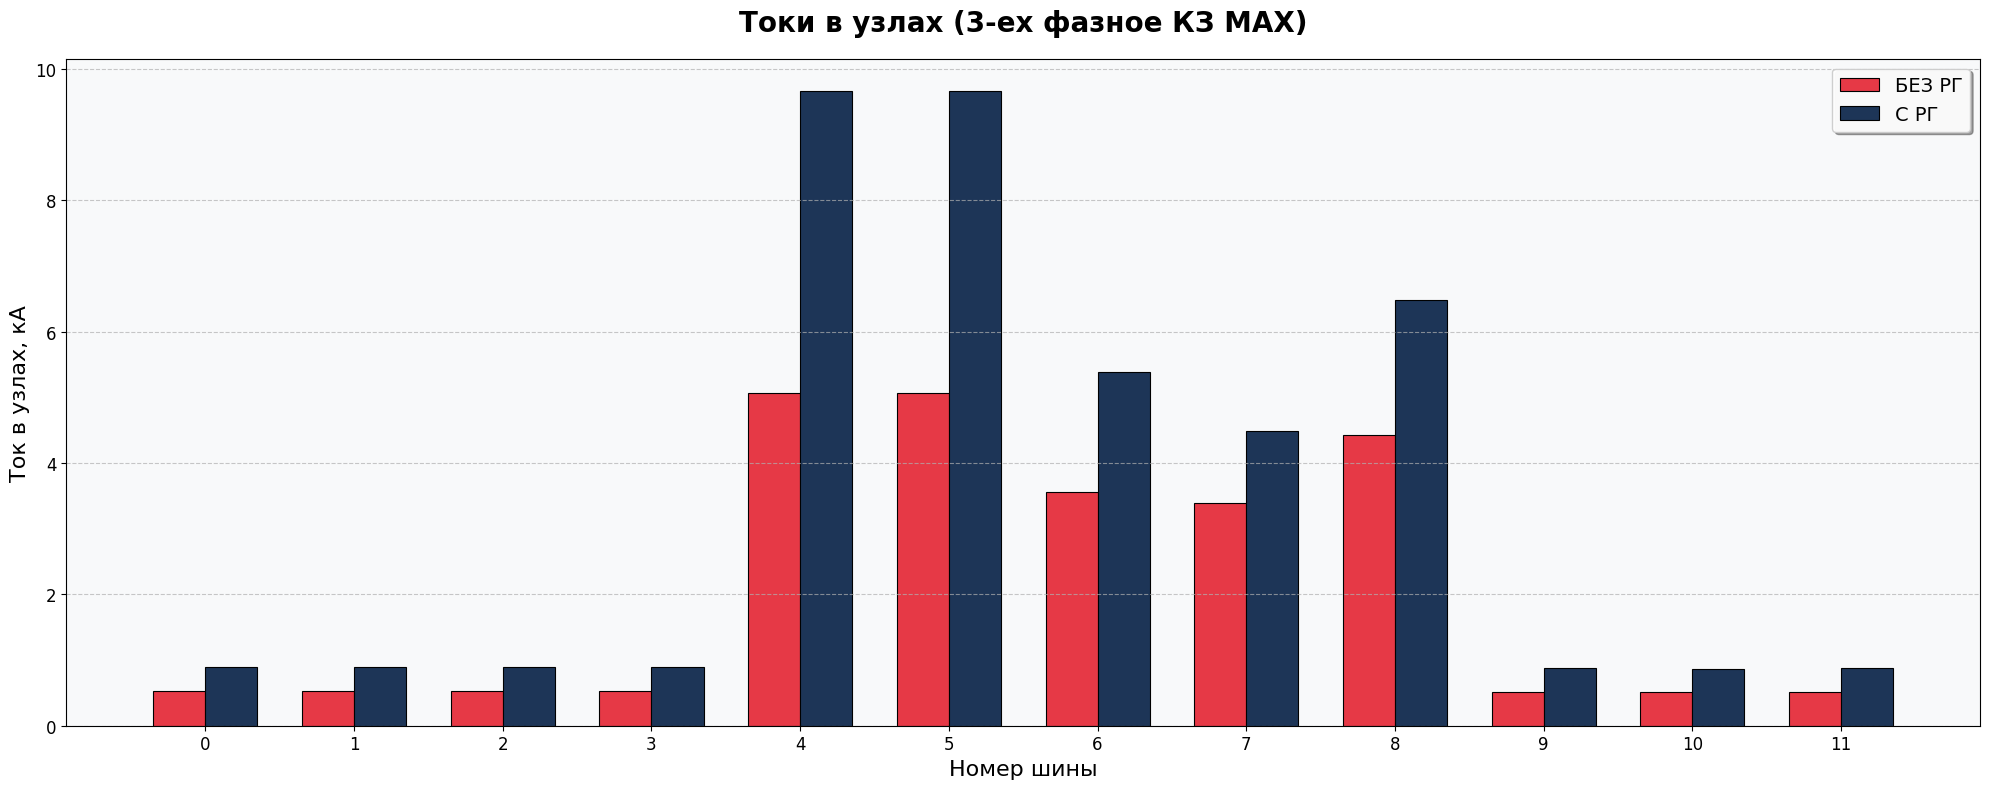

In [460]:
# Трехфазное КЗ MAX
# Размыкаю выключатель между шинами 6 и 7
net = network(0)
sc.calc_sc(
    net,
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)

x1 = net.res_bus_sc.ikss_ka.index
y1 = net.res_bus_sc.ikss_ka

net = network(1)
sc.calc_sc(
    net,
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)

y2 = net.res_bus_sc.ikss_ka

# Ширина одного столбца
bar_width = 0.35

# Сдвигаем позиции для каждого набора данных
x1_left = np.array(x1) - bar_width / 2
x1_right = np.array(x1) + bar_width / 2

fig, ax = plt.subplots(figsize=(20, 8))

# Рисуем столбцы рядом
ax.bar(
    x1_left,
    y1,
    width=bar_width,
    color='#E63946',
    edgecolor='black',
    linewidth=0.8,
    label='БЕЗ РГ'
)

ax.bar(
    x1_right,
    y2,
    width=bar_width,
    color='#1D3557',
    edgecolor='black',
    linewidth=0.8,
    label='С РГ'
)

# Фон
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

# Заголовок и оси
ax.set_title(
    'Токи в узлах (3-ех фазное КЗ MAX)',
    fontsize=20,
    fontweight='bold',
    pad=20
)

ax.set_xlabel('Номер шины', fontsize=16)
ax.set_ylabel('Ток в узлах, кА', fontsize=16)

# Легенда
ax.legend(
    loc='upper right',
    fontsize=14,
    fancybox=True,
    shadow=True,
    framealpha=0.95
)

# Сетка и метки
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(x1)  # Оставляем метки по центру
                # между парами столбцов

plt.tight_layout()
plt.show()

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

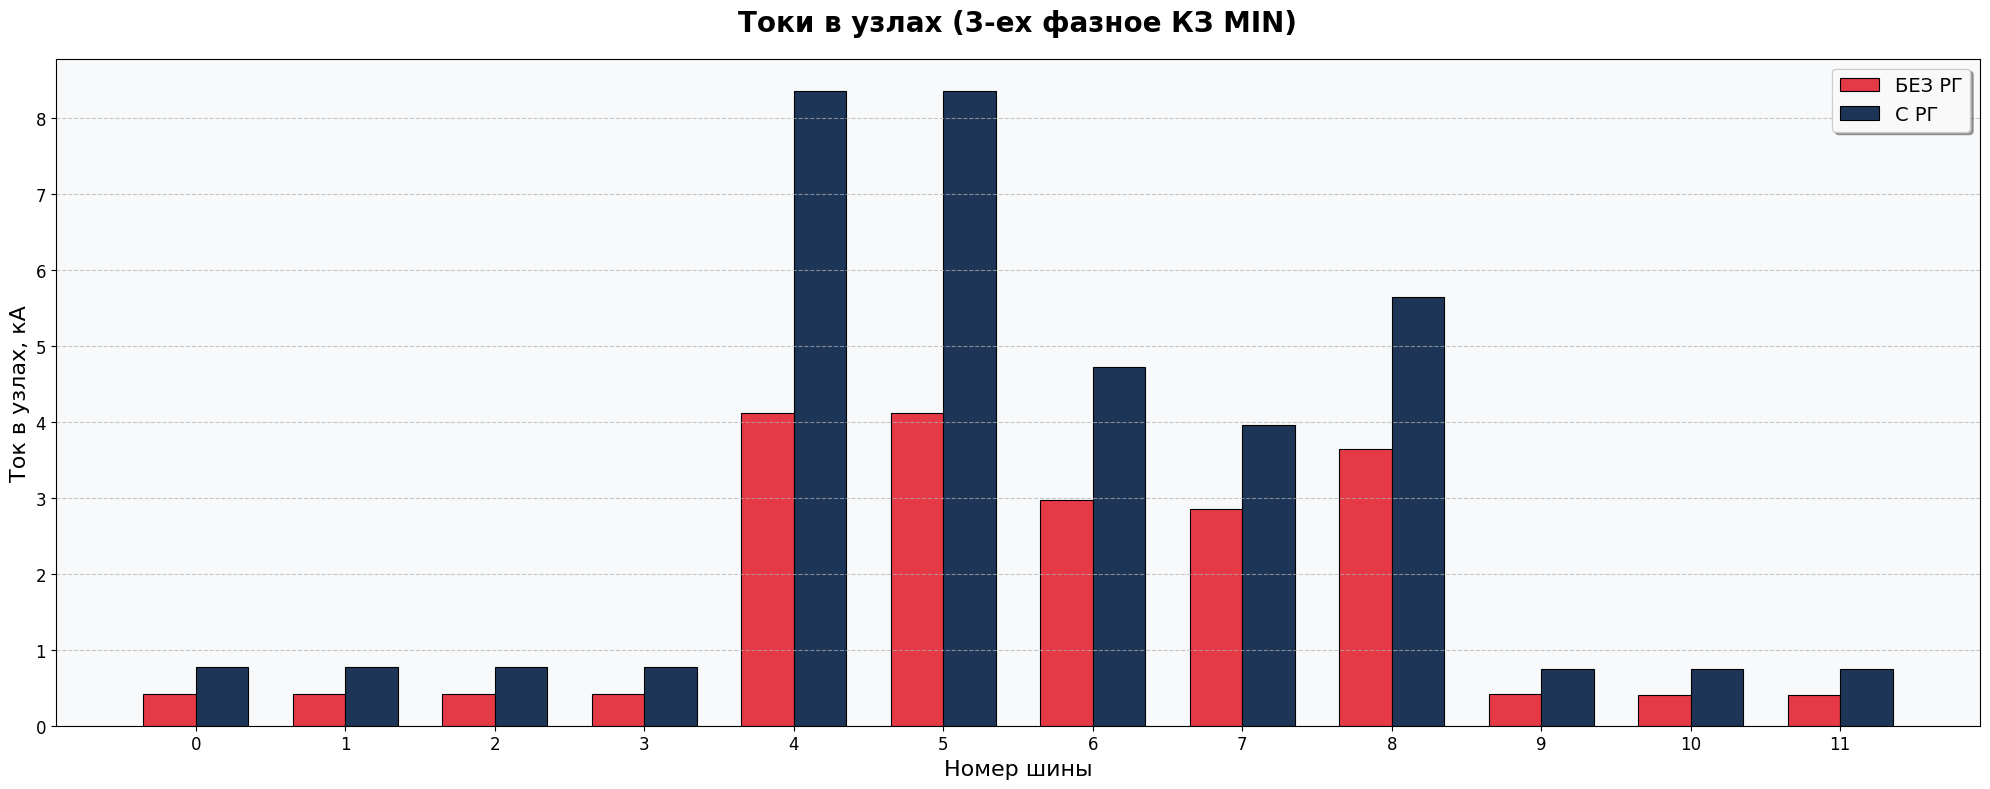

In [461]:
# Трехфазное КЗ MIN
# Размыкаю выключатель между шинами 6 и 7

# Расчёт для случая БЕЗ РГ
net = network(0)
net.line['endtemp_degree'] = 80
sc.calc_sc(
    net,
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
x1 = net.res_bus_sc.ikss_ka.index
y1 = net.res_bus_sc.ikss_ka

# Расчёт для случая С РГ
net = network(1)
net.line['endtemp_degree'] = 80
sc.calc_sc(
    net,
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
y2 = net.res_bus_sc.ikss_ka

# Построение графика
bar_width = 0.35
x1_left = np.array(x1) - bar_width / 2
x1_right = np.array(x1) + bar_width / 2

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(
    x1_left,
    y1,
    width=bar_width,
    color='#E63946',
    edgecolor='black',
    linewidth=0.8,
    label='БЕЗ РГ'
)

ax.bar(
    x1_right,
    y2,
    width=bar_width,
    color='#1D3557',
    edgecolor='black',
    linewidth=0.8,
    label='С РГ'
)

ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

ax.set_title(
    'Токи в узлах (3-ех фазное КЗ MIN)',
    fontsize=20,
    fontweight='bold',
    pad=20
)

ax.set_xlabel('Номер шины', fontsize=16)
ax.set_ylabel('Ток в узлах, кА', fontsize=16)

ax.legend(
    loc='upper right',
    fontsize=14,
    fancybox=True,
    shadow=True,
    framealpha=0.95
)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(x1)

plt.tight_layout()
plt.show()

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

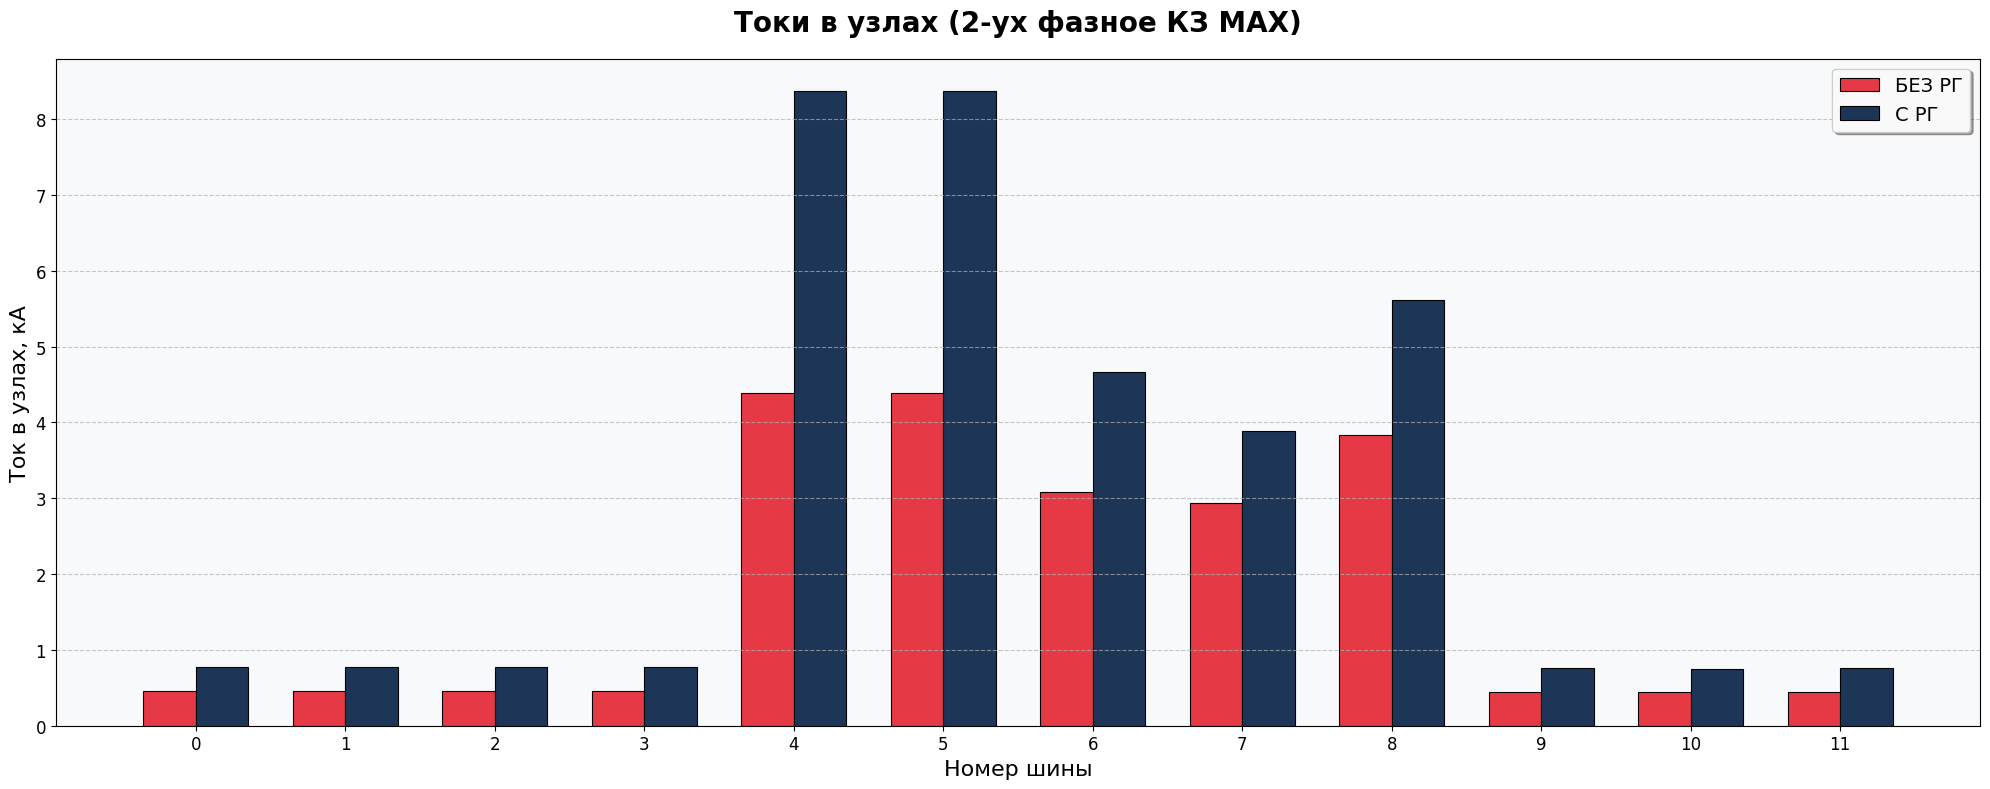

In [462]:
# Двухфазное КЗ MAX
# Размыкаю выключатель между шинами 6 и 7

# Расчёт для случая БЕЗ РГ
net = network(0)
sc.calc_sc(
    net,
    fault="2ph",
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
x1 = net.res_bus_sc.ikss_ka.index
y1 = net.res_bus_sc.ikss_ka

# Расчёт для случая С РГ
net = network(1)
sc.calc_sc(
    net,
    fault="2ph",
    case="max",
    ip=True,
    ith=True,
    branch_results=True
)
y2 = net.res_bus_sc.ikss_ka

# Построение графика
bar_width = 0.35
x1_left = np.array(x1) - bar_width / 2
x1_right = np.array(x1) + bar_width / 2

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(
    x1_left,
    y1,
    width=bar_width,
    color='#E63946',
    edgecolor='black',
    linewidth=0.8,
    label='БЕЗ РГ'
)
ax.bar(
    x1_right,
    y2,
    width=bar_width,
    color='#1D3557',
    edgecolor='black',
    linewidth=0.8,
    label='С РГ'
)

ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

ax.set_title(
    'Токи в узлах (2-ух фазное КЗ MAX)',
    fontsize=20,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Номер шины', fontsize=16)
ax.set_ylabel('Ток в узлах, кА', fontsize=16)

ax.legend(
    loc='upper right',
    fontsize=14,
    fancybox=True,
    shadow=True,
    framealpha=0.95
)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(x1)

plt.tight_layout()
plt.show()

Branch results are in beta mode and might not always be reliable, especially for transformers
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bool)
c:\Users\Globa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandapower\build_branch.py:1344: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  power_station_unit = trafo_df.power_station_unit.fillna(False).values.astype(bo

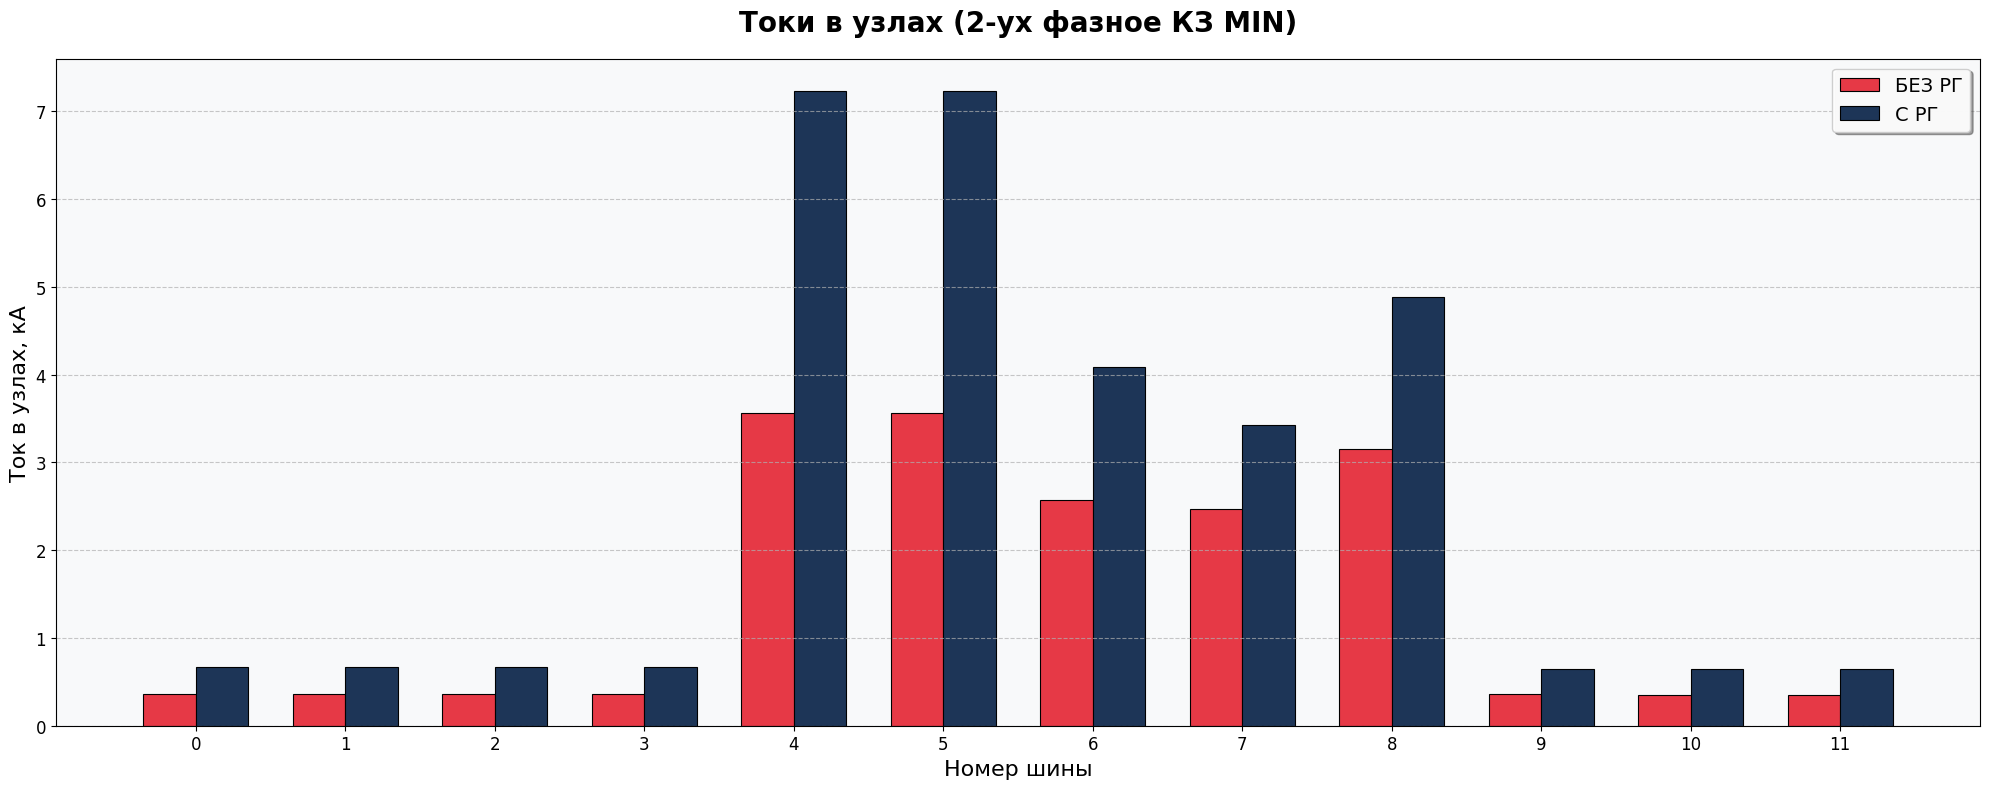

In [463]:
# Двухфазное КЗ MIN
# Размыкаю выключатель между шинами 6 и 7

# Расчёт для случая БЕЗ РГ
net = network(0)
net.line['endtemp_degree'] = 80
sc.calc_sc(
    net,
    fault="2ph",
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
x1 = net.res_bus_sc.ikss_ka.index
y1 = net.res_bus_sc.ikss_ka

# Расчёт для случая С РГ
net = network(1)
net.line['endtemp_degree'] = 80
sc.calc_sc(
    net,
    fault="2ph",
    case="min",
    ip=True,
    ith=True,
    branch_results=True
)
y2 = net.res_bus_sc.ikss_ka

# Построение графика
bar_width = 0.35
x1_left = np.array(x1) - bar_width / 2
x1_right = np.array(x1) + bar_width / 2

fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(
    x1_left,
    y1,
    width=bar_width,
    color='#E63946',
    edgecolor='black',
    linewidth=0.8,
    label='БЕЗ РГ'
)
ax.bar(
    x1_right,
    y2,
    width=bar_width,
    color='#1D3557',
    edgecolor='black',
    linewidth=0.8,
    label='С РГ'
)

ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('white')

ax.set_title(
    'Токи в узлах (2-ух фазное КЗ MIN)',
    fontsize=20,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Номер шины', fontsize=16)
ax.set_ylabel('Ток в узлах, кА', fontsize=16)

ax.legend(
    loc='upper right',
    fontsize=14,
    fancybox=True,
    shadow=True,
    framealpha=0.95
)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', labelsize=12)
plt.xticks(x1)

plt.tight_layout()
plt.show()

#### **Вывод**

В ходе выполнения лабораторной работы были смоделированы режимы короткого замыкания (КЗ) в узлах электрической сети при различных условиях: с учётом наличия и отсутствия распределённой генерации (РГ), а также при трёхфазных и двухфазных КЗ в режимах максимальной и минимальной нагрузки.

Анализ полученных данных показал, что во всех рассмотренных случаях токи КЗ в узлах сети существенно возрастают при подключении распределённой генерации. Например, при трёхфазном КЗ в режиме MAX в узле 4 ток без РГ составил 5,1 кА, а с РГ — 9,7 кА (рост на ~90%). В узле 5 аналогичный рост: с 5,0 кА до 9,6 кА. Даже в режиме MIN наблюдается значительное увеличение — например, в узле 4 ток вырос с 4,1 кА до 8,4 кА (на ~105%).

При двухфазном КЗ картина сохраняется: в узле 4 при MAX — с 4,4 кА до 8,4 кА; в узле 5 — с 4,4 кА до 8,4 кА. В режиме MIN — в узле 4: с 3,6 кА до 7,2 кА (рост на 100%).

Наиболее значимый рост токов наблюдается в узлах 4, 5 и 8 — из-за их близости к источникам. Так, в узле 8 при трёхфазном КЗ MAX ток вырос с 4,4 кА до 6,5 кА — на 48%, что также является существенным изменением.

Таким образом, влияние РГ на величину токов КЗ сохраняется как при максимальной, так и при минимальной мощности системы, хотя абсолютные значения токов, естественно, снижаются в режиме MIN. При этом разница между токами «с РГ» и «без РГ» остаётся статистически значимой во всех сценариях — в среднем рост составляет от 40% до 100% в зависимости от узла и типа КЗ.

Полученные результаты подтверждают необходимость учёта распределённой генерации при расчёте токов КЗ для правильного выбора параметров защитных устройств и обеспечения надёжности работы электроэнергетической системы.